<h1 align="center">Final Project I</h1>

**Anggota Kelompok 5 :**
- Dhelya Apriliani Putri
- Anggita Yuniskara
- Muhammad Rinande Ansutia
- Rizky Mardhatillah

# Pendahuluan
## Uber and Lyft Dataset Boston, MA
From 11-26-2018 to 12-18-2018

Dataset yang akan di olah kali ini adalah Uber and Lyft Dataset Boston, MA. Dataset mengandung banyak nilai NA. Ini adalah kumpulan data yang bagus untuk menggunakan Model Regresi Linier dan melihat pola antara predektor yang berbeda seperti jam dan harga.

Bagian yang menarik dari kumpulan data ini adalah data ini menyertakan data cuaca yang sesuai untuk jam tersebut dengan ringkasan singkat tentang cuaca. Faktor penting lainnya adalah suhu, angin, dan matahari terbenam.

Semoga dengan data ini kami dapat menggunakan Model Regresi Linier dengan baik.

## Import Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [6]:
#import file
df_can = pd.read_csv('rideshare_kaggle.csv', encoding='utf-8')

In [7]:
#lima item pertama dalam dataset
df_can.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [8]:
df_can.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [9]:
#5 item terakhir dalam datset
df_can.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
23705,bab88976-2955-4689-ad6b-410494652bf4,1.543299e+09,6,27,11,2018-11-27 06:06:22,America/New_York,West End,North End,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
23706,717cd5ac-8754-4fb7-9cb2-2b01aee765d4,1.543360e+09,23,27,11,2018-11-27 23:06:22,America/New_York,Boston University,Financial District,Lyft,...,0.1438,1.543338e+09,36.37,1.543378e+09,46.74,1.543320e+09,32.60,1.543378e+09,43.93,1.543320e+09
23707,835281c1-021b-4b99-9f90-25c8ba16d068,1.543445e+09,22,28,11,2018-11-28 22:38:07,America/New_York,Boston University,Financial District,Lyft,...,0.0000,1.543421e+09,33.85,1.543399e+09,42.61,1.543439e+09,30.03,1.543399e+09,36.57,1.543439e+09
23708,a6c8e895-8009-415e-a6f0-7e51aed61072,1.543407e+09,12,28,11,2018-11-28 12:17:08,America/New_York,Boston University,Financial District,Lyft,...,0.0000,1.543421e+09,33.83,1.543399e+09,42.61,1.543439e+09,30.13,1.543399e+09,36.60,1.543439e+09
23709,c67da1f3-6bd2-4f91-901b-f851cb2a6e46,1.544917e+09,23,15,12,2018-12-15 23:35:10,America/New_York,Boston University,Financial District,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Melihhat tipe data
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23710 entries, 0 to 23709
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           23710 non-null  object 
 1   timestamp                    23710 non-null  float64
 2   hour                         23710 non-null  int64  
 3   day                          23710 non-null  int64  
 4   month                        23710 non-null  int64  
 5   datetime                     23710 non-null  object 
 6   timezone                     23710 non-null  object 
 7   source                       23710 non-null  object 
 8   destination                  23710 non-null  object 
 9   cab_type                     23709 non-null  object 
 10  product_id                   23709 non-null  object 
 11  name                         23709 non-null  object 
 12  price                        21834 non-null  float64
 13  distance        

In [11]:
# Melihat jumlah rows dan columns
print(df_can.shape)

(23710, 57)


## Data Cleaning

In [12]:
# Menjumlah kan missing values
missing_values = df_can.isnull().sum()

In [13]:
print(missing_values[missing_values > 0])

cab_type                          1
product_id                        1
name                              1
price                          1876
distance                          1
surge_multiplier                  1
latitude                          1
longitude                         1
temperature                       1
apparentTemperature               1
short_summary                     1
long_summary                      1
precipIntensity                   1
precipProbability                 1
humidity                          1
windSpeed                         1
windGust                          1
windGustTime                      1
visibility                        1
temperatureHigh                   1
temperatureHighTime               1
temperatureLow                    1
temperatureLowTime                1
apparentTemperatureHigh           1
apparentTemperatureHighTime       1
apparentTemperatureLow            1
apparentTemperatureLowTime        1
icon                        

In [14]:
# Menghapus Null values
df_can.dropna(subset=['price'], inplace=True)

In [15]:
df_can.shape

(21834, 57)

In [16]:
missing_values = df_can.isnull().sum()
missing_values

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [17]:
unique_cab_types = df_can['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


In [18]:
# Mengubah tipe data menjadi timeseries dengan pandas
df_can['datetime'] = pd.to_datetime(df_can['datetime'])

In [21]:
# Menjumlahkan data berdasrkan jam
hour_counts = df_can.groupby([df_can['datetime'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)

In [22]:
df_can['datetime'].head()

0   2018-12-16 09:30:07
1   2018-11-27 02:00:23
2   2018-11-28 01:00:22
3   2018-11-30 04:53:02
4   2018-11-29 03:49:20
Name: datetime, dtype: datetime64[ns]

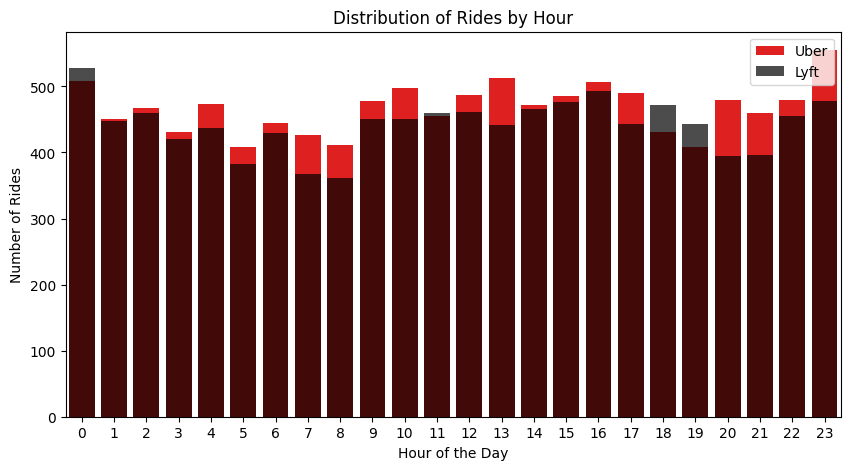

In [23]:
# Plotting Data
plt.figure(figsize=(10, 5))
sns.barplot(x=hour_counts.index, y=hour_counts['Uber'], label='Uber', color='red')
sns.barplot(x=hour_counts.index, y=hour_counts['Lyft'], label='Lyft', color='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Hour')
plt.legend()
plt.show()

Dari data diatas kita dapat mengetahui bahwa jumlah frekuensi "Distribution of Rides by Hour" paling tinggi adalah pukul 23 dan 00

In [24]:
# Mengelompokkan data berdasarkan hari dan cab_type
daily_counts = df_can.groupby([df_can['datetime'].dt.day, 'cab_type'])['id'].count().unstack().fillna(0)

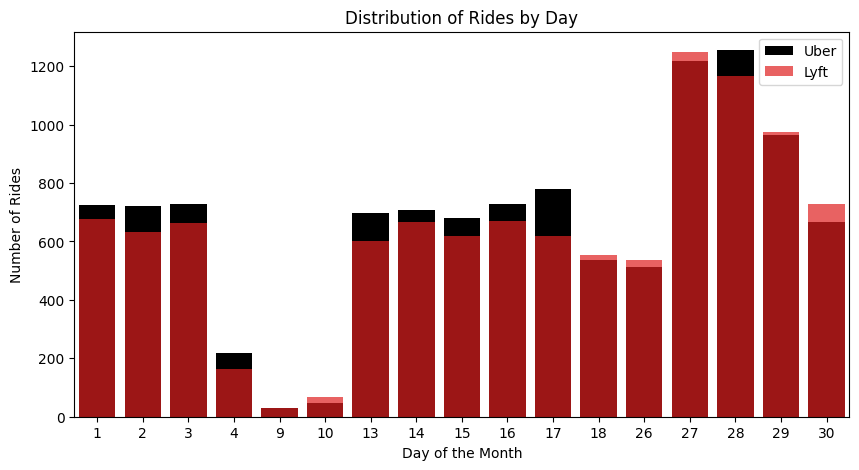

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts['Uber'], label='Uber', color='black')
sns.barplot(x=daily_counts.index, y=daily_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Day')
plt.legend()
plt.show()

In [26]:
monthly_counts = df_can.groupby([df_can['datetime'].dt.month, 'cab_type'])['id'].count().unstack().fillna(0)

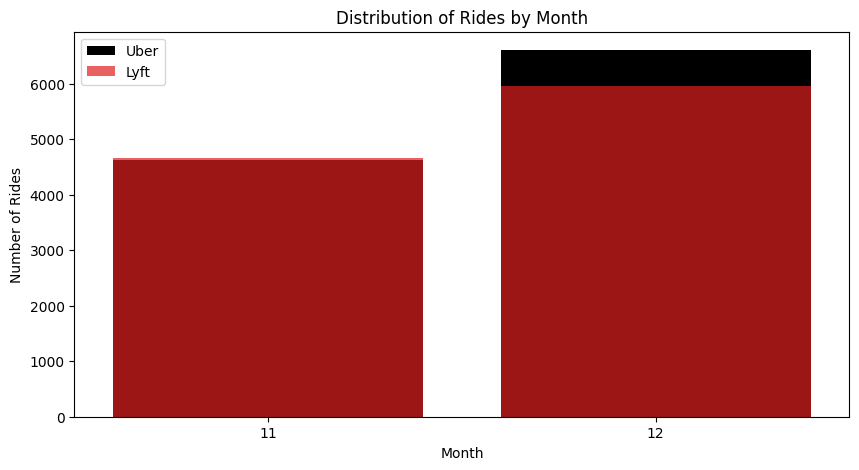

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts['Uber'], label='Uber', color='black')
sns.barplot(x=monthly_counts.index, y=monthly_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Month')
plt.legend()
plt.show()

In [28]:
source_counts = df_can.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)

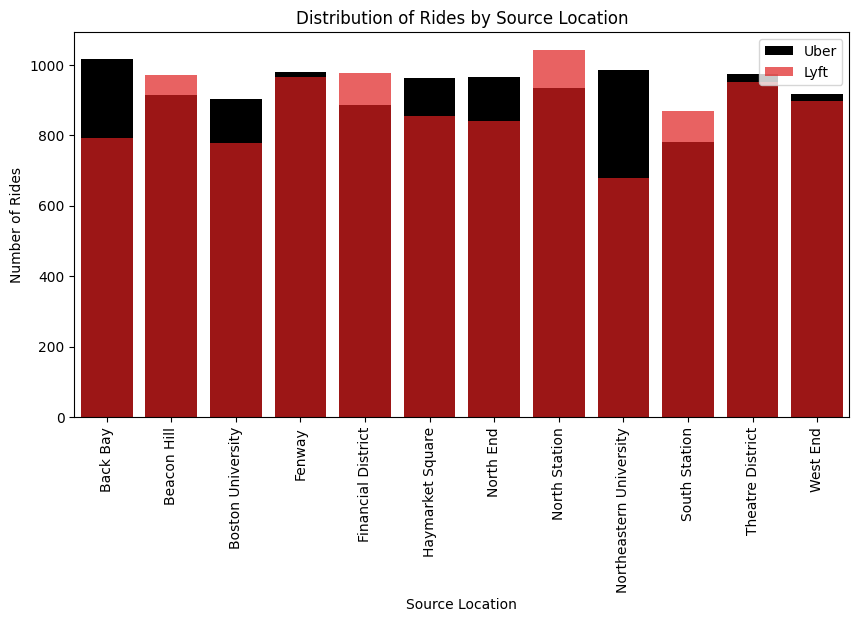

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x=source_counts.index, y=source_counts['Uber'], label='Uber', color='black')
sns.barplot(x=source_counts.index, y=source_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Source Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Source Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [30]:
destination_counts = df_can.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

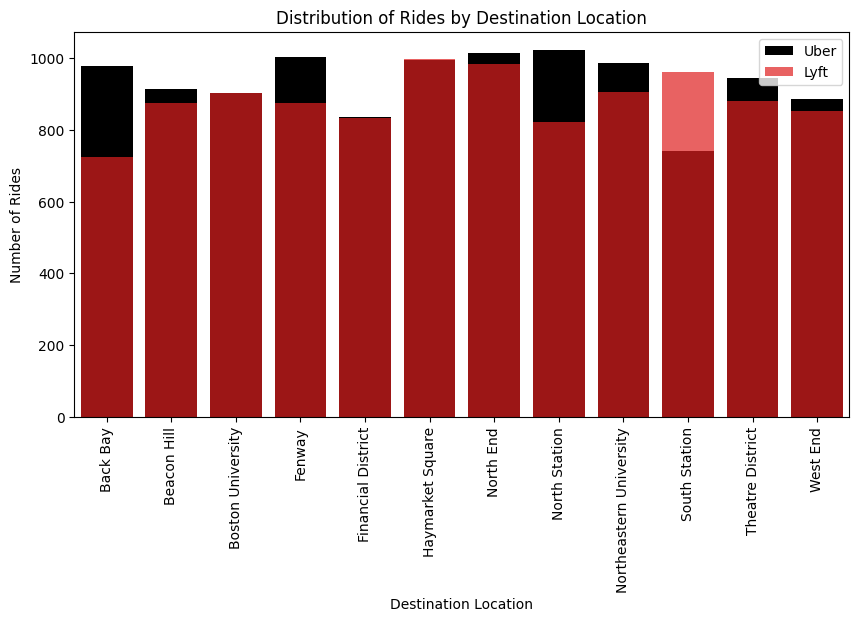

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x=destination_counts.index, y=destination_counts['Uber'], label='Uber', color='black')
sns.barplot(x=destination_counts.index, y=destination_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Destination Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Destination Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [32]:
cab_type_counts = df_can['cab_type'].value_counts()

In [33]:
unique_cab_types = df_can['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


In [34]:
print("Counts of each 'cab_type':")
print(cab_type_counts)

Counts of each 'cab_type':
Uber    11219
Lyft    10615
Name: cab_type, dtype: int64


In [35]:
total_count = cab_type_counts.sum()
percentage_distribution = (cab_type_counts / total_count) * 100
summary_statistics = cab_type_counts.describe()

In [36]:
print("\nSummary Statistics:")
print(f"Total Count: {total_count}")
print(f"Percentage Distribution:\n{percentage_distribution}")
print("\nSummary Statistics for Count:")
print(summary_statistics)


Summary Statistics:
Total Count: 21834
Percentage Distribution:
Uber    51.383164
Lyft    48.616836
Name: cab_type, dtype: float64

Summary Statistics for Count:
count        2.000000
mean     10917.000000
std        427.092496
min      10615.000000
25%      10766.000000
50%      10917.000000
75%      11068.000000
max      11219.000000
Name: cab_type, dtype: float64


# Decision Tree
Decision tree adalah flowchart-like tree structure di mana internal node mewakili feature(atau atribute), branch mewakili decision rule, dan setiap leaf node mewakili outcome.

### 1. Tujuan Analisis:

**Prediksi Jenis Taksi:** cab_type adalah variabel dependen atau label yang tepat. Tujuannya adalah memahami bagaimana atribut-atribut lain memengaruhi atau memprediksi jenis taksi yang dipilih oleh pelanggan.
### 2. Klasifikasi Kategori:

**Penentuan Kategori:** Ketika memprediksi kategori atau label, seperti jenis taksi, dalam sebuah tugas klasifikasi memerlukan variabel dependen yang merupakan target prediksi. Dalam hal ini, cab_type akan menjadi label yang akan diprediksi oleh model.
### 3. Penentuan Jenis Taksi:

**Rekomendasi Jenis Taksi:** Model ini memungkinkan untuk memberikan rekomendasi tentang jenis taksi yang paling sesuai berdasarkan atribut lainnya. Misalnya, model dapat membantu pelanggan dalam memilih taksi yang paling efisien atau ekonomis berdasarkan waktu, harga, cuaca, atau faktor lainnya.
### 4. Analisis Pola Konsumen:

**Memahami Preferensi Konsumen:** Dengan menjadikan cab_type sebagai variabel dependen, memungkinkan untuk dapat menganalisis preferensi konsumen terhadap jenis taksi tertentu dan mengidentifikasi pola atau faktor-faktor yang memengaruhi pilihan mereka. Ini dapat membantu dalam pengambilan keputusan bisnis, pemasaran, dan perbaikan layanan.
Dengan menjadikan cab_type sebagai variabel dependen, ini memungkinkan model untuk belajar dari data historis dan melakukan prediksi atau klasifikasi jenis taksi berdasarkan atribut-atribut lainnya. Ini membantu dalam pemahaman lebih mendalam tentang perilaku konsumen dan memberikan landasan untuk pengambilan keputusan yang lebih baik dalam bisnis atau aplikasi yang melibatkan transportasi.

In [37]:
df = df_can.drop(['id','source', 'destination', 'product_id','name', 'latitude', 'longitude', 'apparentTemperature', 'short_summary', 'long_summary',
            'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
            'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
            'sunriseTime', 'sunsetTime', 'moonPhase', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'], axis = 1)

In [38]:
df.head()

,timestamp,hour,day,month,datetime,timezone,cab_type,price,distance,surge_multiplier,...,windSpeed,windGust,windGustTime,visibility,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Lyft,5.0,0.44,1.0,...,8.66,9.17,1.545016e+09,10.000,0.1276,1.544980e+09,39.89,43.68,33.73,38.07
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Lyft,11.0,0.44,1.0,...,11.98,11.98,1.543291e+09,4.786,0.1300,1.543252e+09,40.49,47.30,36.20,43.92
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Lyft,7.0,0.44,1.0,...,7.33,7.33,1.543334e+09,10.000,0.1064,1.543338e+09,35.36,47.55,31.04,44.12
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Lyft,26.0,0.44,1.0,...,5.28,5.28,1.543514e+09,10.000,0.0000,1.543507e+09,34.67,45.03,30.30,38.53
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Lyft,9.0,0.44,1.0,...,9.14,9.14,1.543446e+09,10.000,0.0001,1.543421e+09,33.10,42.18,29.11,35.75


In [ ]:
unique_cab_types = df['cab_type'].unique()
print(unique_cab_types)

In [ ]:
df.isnull().sum()

In [ ]:
 df.columns

In [ ]:
df.info()

In [ ]:
# Transformasi data menjadi numerik
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['cab_type'] = enc.fit_transform(df['cab_type'].values)

In [ ]:
feature_cols = ['hour', 'day', 'month', 'distance', 'price', 'temperature', 'surge_multiplier', 'precipIntensityMax', 'precipIntensity', 'uvIndexTime', 'temperatureMin', 'temperatureMax', 'humidity', 'windSpeed', 'windGust', 'apparentTemperatureMax']
X = df[feature_cols]
y = df['cab_type']

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


In [ ]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Visualizing Decision Trees

In [ ]:
class_names = df['cab_type'].unique().astype(str)

import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
 class_names=class_names, # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Optimizing Decision Tree Performance

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifer correct?
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

In [ ]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, class_names=['0', '1'], feature_names=feature_cols, filled=True,
                    rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
df.columns

In [ ]:
df.copy()

# K-Nearest Neighbors

## Overview Model K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. Model ini didasarkan pada konsep bahwa objek yang serupa cenderung berada dekat satu sama lain dalam ruang fitur. Berikut beberapa poin penting terkait dengan KNN:

### Cara Kerja

1. **Menentukan Nilai K**: Pada awalnya, kita harus memilih jumlah tetangga terdekat (K) yang akan digunakan dalam proses klasifikasi atau regresi. Nilai K yang tepat dapat memengaruhi performa model.

2. **Perhitungan Jarak**: KNN menghitung jarak antara titik data yang akan diprediksi dan semua titik data dalam set training. Metrik jarak yang umum digunakan adalah Euclidean distance atau Manhattan distance. Kita dapat memilih metrik jarak yang sesuai dengan karakteristik data.

3. **Menentukan Tetangga Terdekat**: KNN memilih K titik data dengan jarak terdekat ke titik data yang akan diprediksi.

4. **Voting (Klasifikasi) atau Rata-rata (Regresi)**: Dalam klasifikasi, KNN melakukan voting mayoritas dari label neighbors untuk menentukan label dari titik data yang akan diprediksi. Dalam regresi, KNN menghitung rata-rata nilai dari tetangga untuk memprediksi nilai kontinu.

### Hyperparameter KNN

- **n_neighbors**: Jumlah neighbors terdekat yang akan digunakan dalam proses prediksi. Pemilihan nilai K yang optimal sangat penting, karena nilai yang terlalu kecil dapat menyebabkan model sensitif terhadap noise (outlier), sedangkan nilai yang terlalu besar dapat menghilangkan aspek lokalitas.
- **metric**: Metrik jarak yang akan digunakan, seperti 'euclidean' (jarak Euclidean) atau 'manhattan' (jarak Manhattan).
- **weights**: Menentukan cara memberi bobot pada tetangga. 'uniform' memberikan bobot yang sama pada semua tetangga, sementara 'distance' memberikan bobot berdasarkan kebalikan jarak.

### Keuntungan

- Dapat diterapkan terhadap data dengan berbagai macam distribusi
- Contoh, data tidak harus dapat dipisahkan dengan garis linear
- Sangat mudah dan intuitif
- Merupakan klasifikasi yang baik jika jumlah sampel yang tersedia cukup besar.

### Kelemahan

- Menentukan k dapat menjadi sulit
- Tahap testing memerlukan komputasi yang mahal
- Tidak memiliki tahapan training, seluruh proses dilakukan pada tahap testing
- Hal ini bertolak belakang dengan yang diinginkan. Biasanya tahap training memakan waktu yang lama, sedangkan kita menginginkan tahap testing yang cepat.
- Memerlukan sampel dalam jumlah besar untuk memperoleh akurasi yang baik.

### Evaluasi

- Untuk mengevaluasi performa model KNN, umumnya digunakan metrik seperti akurasi (untuk klasifikasi) atau Mean Squared Error (MSE) (untuk regresi).
- Cross-validation sering digunakan untuk menghindari overfitting dan menentukan parameter K yang optimal.

KNN adalah algoritma yang sering digunakan untuk melakukan data imputation.


### Melakukan Data Preprocessing KNN

In [ ]:
df_knn = df.copy()
df_knn['datetime_unix'] = df_knn['datetime'].apply(lambda x: x.timestamp())
df_knn = df_knn.drop(columns=['datetime', 'timezone'])
df_knn.info()

In [ ]:
X = df_knn.drop('cab_type', axis=1)
y = df_knn['cab_type']

In [ ]:
def count_outliers_iqr(df):
    outlier_counts = pd.DataFrame(columns=['Attribute', 'Outlier Count', 'Lower Bound', 'Upper Bound'])

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outlier_count = len(outliers)
            outlier_counts = outlier_counts._append({'Attribute': column, 'Outlier Count': outlier_count, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound}, ignore_index=True)

    return outlier_counts

In [ ]:
data_outlier = count_outliers_iqr(df_knn)
data_outlier

Karena data diatas memiliki banyak outlier maka dapat menggunakan minimal 3 neighbors agar data tidak bergabung dengan outlier.<br>
k yang lebih besar mungkin memperbaiki performance, namun k yang terlalu
besar menghilangkan aspek lokalitas.

### Pembuatan Model KNN

Train test split dengan size 8:2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Menggunakan standardscaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

Melakukan prediksi knn

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Menampilkan confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Dari data tersebut terlihat bahwa,<br>
TN (True Negative) = 49417<br>
TP (True Positive) = 49486<br>
FN (False Negative) = 16771<br>
FP (False Positive) = 11922<br>

### Optimisasi KNN

In [ ]:
knn_grid = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

Setelah dijalankan, accuracy tertinggi didapatkan pada n_neighbors=5, dan weights='distance'

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_best.fit(X_train, y_train)

In [ ]:
y_pred_best = knn_best.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred)

print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)

Terlihat terdapat peningkatan accuracy dari prediksi

### Kesimpulan KNN

Setelah dilakukan beberapa pengujian, dapat dilihat bahwa nilai K sangat mempengaruhi keakuratan model. Selain itu, nilai bobot dari jarak tersebut juga mempengaruhi.

<img src="https://i.ibb.co/KVFkQjM/qewdfs.png" alt="klasifikasi-tes" width="40%">

- Accuracy, ini merupakan tingkat ketepatan antara prediksi dan hasil sebenarnya. Semakin tinggi semakin bagus
- F1-Score, F1-score baru akan besar kalau kedua nilai precision dan recall besar. Jika ada salah satu yang rendah, maka nilai F1 juga akan rendah
- Recall, merupakan True Positive Rate
- Precision, merupakan TP/(TP+FP)

Dari data sebelum optimisasi dan setelah optimisasi, didapatkan bahwa nilai accuracy, precision, dan recall meningkat yang menandakan bahwa terjadi peningkatan performa model.

## Naive Bayes

## Summary Naive Bayes

Naive Bayes adalah salah satu algoritma klasifikasi dalam machine learning yang berdasarkan teori probabilitas. Gaussian NB adalah variasi dari algoritma Naive Bayes yang digunakan ketika data yang diamati memiliki distribusi Gaussian. Berikut adalah poin-poin terkait Gaussian Naive Bayes:

## 1. Dasar Teori

![Datacamp](https://images.datacamp.com/image/upload/f_auto,q_auto:best/v1543836882/image_3_ijznzs.png)

P(h): probabilitas hipotesis h menjadi benar (tanpa mempertimbangkan data). Ini dikenal sebagai probabilitas prior dari h.<br>
P(D): probabilitas data (tanpa mempertimbangkan hipotesis). Ini dikenal sebagai probabilitas prior.<br>
P(h|D): probabilitas hipotesis h yang diberikan data D. Ini dikenal sebagai probabilitas posterior.<br>
P(D|h): probabilitas data d diberikan bahwa hipotesis h benar. Ini dikenal sebagai probabilitas posterior.<br>

Gaussian Naive Bayes mengandalkan Teorema Bayes untuk menghitung probabilitas posterior kelas dari sebuah sampel, dengan asumsi bahwa fitur-fitur yang diamati dalam sampel mengikuti distribusi Gaussian. Dalam hal ini, "Naive" berarti asumsi bahwa setiap fitur adalah independen, meskipun dalam dunia nyata, independensi ini seringkali tidak terpenuhi.

## 2. Asumsi Distribusi Gaussian

Gaussian Naive Bayes bekerja dengan baik ketika data yang diamati memiliki distribusi Gaussian atau mendekati distribusi Gaussian. Ini berarti data kontinu yang terdistribusi normal cenderung memberikan hasil yang baik dengan algoritma ini.

## 3. Penggunaan

Gaussian Naive Bayes sering digunakan dalam aplikasi klasifikasi, terutama di mana data memiliki sifat distribusi Gaussian. Contoh penggunaan yang umum termasuk klasifikasi email spam atau non-spam, handwriting re, dan identifikasi pola medis.

## 4. Kelebihan

- Sederhana dan cepat dalam pelatihan dan prediksi.
- Cocok untuk data dengan banyak fitur.

## 5. Keterbatasan

- Mengasumsikan bahwa fitur-fitur adalah independen, yang mungkin tidak benar dalam banyak situasi.
- Kinerja buruk jika asumsi distribusi Gaussian tidak terpenuhi.

Gaussian Naive Bayes adalah algoritma klasifikasi yang kuat ketika asumsi-asumsi yang mendasarinya terpenuhi. Namun, sangat penting untuk memahami sifat data kita sebelum menggunakannya.


## Pembuatan Model Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

Membuat model evaluation testing

In [ ]:
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Melakukan visualisasi confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Dari data tersebut terlihat bahwa, <br>
TN (True Negative) = 6335<br>
TP (True Positive) = 99026<br>
FN (False Negative) = 0<br>
FP (False Positive) = 86032<br>

## Optimisasi Naive Bayes

In [ ]:
gnb_grid = GaussianNB()

param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
    'var_smoothing': np.logspace(0,-9, num=5)
}

grid_search = GridSearchCV(gnb_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Accuracy):", grid_search.best_score_)

In [ ]:
best_gnb = GaussianNB(priors=[0.8, 0.2], var_smoothing=0.005623413251903491)
best_gnb.fit(X_train, y_train)

In [ ]:
y_pred = best_gnb.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

### Kesimpulan

Dapat dilihat bahwa akurasi maksimum yang bisa didapatkan hanya sekitar 55.1%. Dengan demikian, bisa dibilang dataset ini kurang baik jika diaplikasikan menggunakan model Gauss. Terdapat beberapa faktor yang dapat mempengaruhi hal ini, seperti model dataset tersebut kurang mengikuti distribusi Gauss dan dataset cenderung kurang terdistribusi secara normal.

Untuk mencoba melakukan performa, kami menggunakan GridSearchCV yang melakukan cross validation dengn fold = K. Dengan memasukan parameter, priors dan var_smoothing. Dengan demikian, model tersebut dapat terjadi peningkatan performa walaupun sangat kecil.

# Support Vector Machine
Support Vector Machine (SVM) adalah salah satu algoritma machine learning dengan pendekatan supervised learning yang paling populer dan sering digunakan. SVM dapat digunakan dengan mencari hyperplane atau fungsi pemisah terbaik untuk memisahkan kelas. Algoritma SVM bekerja dengan mengelompokkan data-data dengan memisahkannya berdasarkan hyperplane dalam ruang N-dimensi (N – jumlah fitur) yang secara jelas mengklasifikasikan titik data. SVM sangat disukai karena algoritma ini dapat menghasilkan akurasi yang signifikan dengan daya komputasi yang lebih sedikit. Beberapa kelebihan dari SVM antara lain: mampu menangani data berdimensi tinggi, dapat digunakan untuk model pembelajaran semi-supervised, dan memiliki tingkat akurasi yang lebih baik dan melakukan prediksi lebih cepat. Namun, SVM memiliki kompleksitas komputasi yang lebih baik dibandingkan dengan algoritma lain.

In [19]:
# import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
df_svm = df.copy()

In [40]:
df_svm.head()

,timestamp,hour,day,month,datetime,timezone,cab_type,price,distance,surge_multiplier,...,windSpeed,windGust,windGustTime,visibility,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Lyft,5.0,0.44,1.0,...,8.66,9.17,1.545016e+09,10.000,0.1276,1.544980e+09,39.89,43.68,33.73,38.07
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Lyft,11.0,0.44,1.0,...,11.98,11.98,1.543291e+09,4.786,0.1300,1.543252e+09,40.49,47.30,36.20,43.92
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Lyft,7.0,0.44,1.0,...,7.33,7.33,1.543334e+09,10.000,0.1064,1.543338e+09,35.36,47.55,31.04,44.12
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Lyft,26.0,0.44,1.0,...,5.28,5.28,1.543514e+09,10.000,0.0000,1.543507e+09,34.67,45.03,30.30,38.53
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Lyft,9.0,0.44,1.0,...,9.14,9.14,1.543446e+09,10.000,0.0001,1.543421e+09,33.10,42.18,29.11,35.75


In [41]:
df_svm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21834 entries, 0 to 23708
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               21834 non-null  float64       
 1   hour                    21834 non-null  int64         
 2   day                     21834 non-null  int64         
 3   month                   21834 non-null  int64         
 4   datetime                21834 non-null  datetime64[ns]
 5   timezone                21834 non-null  object        
 6   cab_type                21834 non-null  object        
 7   price                   21834 non-null  float64       
 8   distance                21834 non-null  float64       
 9   surge_multiplier        21834 non-null  float64       
 10  temperature             21834 non-null  float64       
 11  precipIntensity         21834 non-null  float64       
 12  precipProbability       21834 non-null  float6

In [42]:
df_svm.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'cab_type',
       'price', 'distance', 'surge_multiplier', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

### Pemilihan Features

In [43]:
features = df_svm[['price', 'distance', 'surge_multiplier', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax']]
X = features
y = df_svm['cab_type']

Penentuan fitur-fitur yang akan digunakan untuk mendapatkan target cab_type. Fitur-fitur tersebut sangat mempengaruhi penumpang untuk memilih jenis taksi. Menjadikan cab_type sebagai target. Pemilihan 'cab_type' sebagai target adalah karena tujuan analisis adalah untuk memprediksi jenis taksi yang akan dipilih oleh pengguna berdasarkan kombinasi faktor-faktor di atas.

### Pembuatan Model SVM

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Membagi dataset menjadi dua bagian, yaitu data pelatihan(train) dan data pengujian(test)

In [45]:
# Pelatihan Model
cs = SVC(kernel='linear', random_state=0)
cs.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
y_pred = cs.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 817 1326]
 [ 823 1401]]


Membuat confussion matrix dari hasil prediksi model

In [48]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Lyft       0.50      0.38      0.43      2143
        Uber       0.51      0.63      0.57      2224

    accuracy                           0.51      4367
   macro avg       0.51      0.51      0.50      4367
weighted avg       0.51      0.51      0.50      4367



Cetak classification report

In [49]:
y_pred = cs.predict(X_test)

In [50]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Cetak classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 817 1326]
 [ 823 1401]]
Classification Report:
              precision    recall  f1-score   support

        Lyft       0.50      0.38      0.43      2143
        Uber       0.51      0.63      0.57      2224

    accuracy                           0.51      4367
   macro avg       0.51      0.51      0.50      4367
weighted avg       0.51      0.51      0.50      4367



Melakukan evaluasi hasil prediksi dari model

### Menampilkan Visualisasi Confussion Matrix


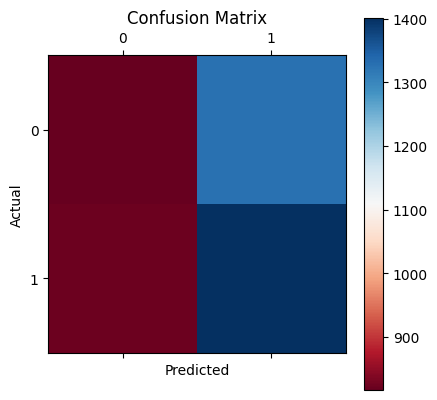

In [51]:
plt.matshow(cm, cmap='RdBu')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Kesimpulan

Berdasarkan hasil dari confusion matrix dan laporan klasifikasi di atas, kesimpulan yang dapat diambil adalah model memiliki tingkat akurasi sekitar 51%, yang menunjukkan performa klasifikasi yang kurang memuaskan. Precision dan recall untuk kedua kelas, "Lyft" dan "Uber," juga relatif rendah, dengan "Lyft" memiliki tingkat precision yang lebih rendah daripada "Uber," dan "Uber" memiliki recall yang lebih rendah daripada "Lyft."